Number of components explaining 90% variance: 26


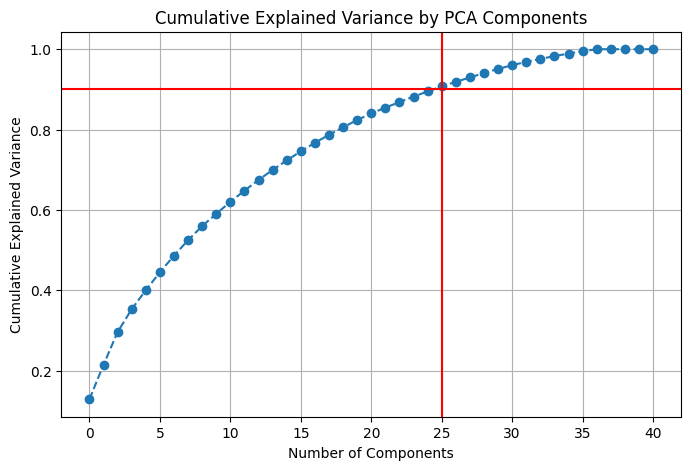

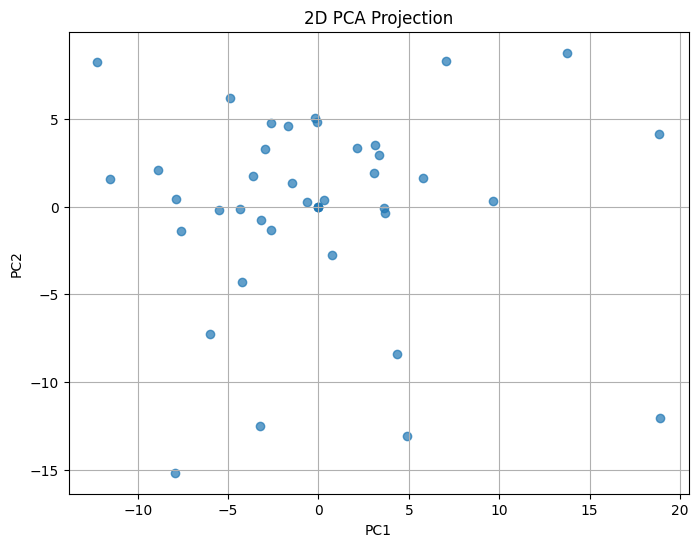

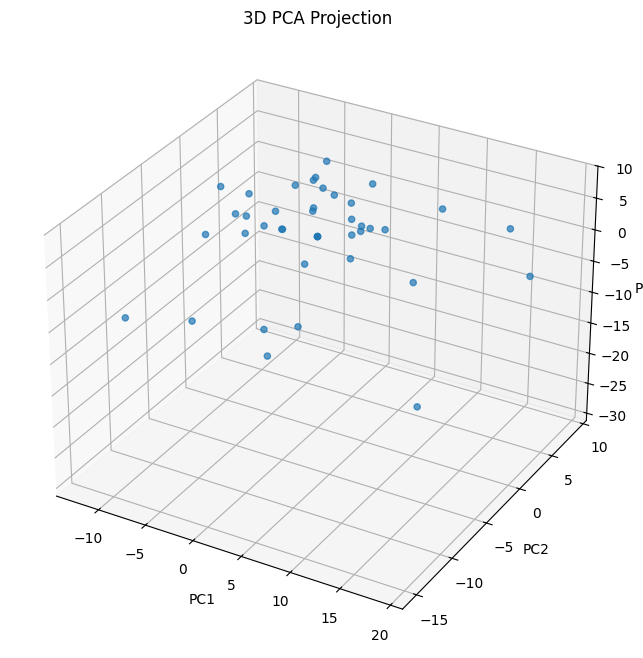

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# Load the preprocessed features (X)
X = pd.read_csv('features_preprocessed.csv')

# Standardize features (mean=0, std=1) - optional if already scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance ratio
cum_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components that explain >90% variance
n_components_90 = np.argmax(cum_variance >= 0.90) + 1
print(f'Number of components explaining 90% variance: {n_components_90}')

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cum_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axvline(x=n_components_90-1, color='r', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Visualize data in 2D and 3D using the top components
# 2D plot with first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection')
plt.grid(True)
plt.show()

# 3D plot with first three principal components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection')
plt.show()